In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns # for the correlation matrix plot
import matplotlib.pyplot as plt
import pydot
import pydotplus
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from graphviz import render
from graphviz import Source

from sklearn.tree import export_graphviz

from google.colab import files
uploaded = files.upload()
# read in the file to import the wdbc dataset 
wdbc = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']))
# Print some basic data info
print(wdbc.describe())
print(wdbc.head())
print(wdbc.shape)
print(wdbc.columns)

Saving wdbcwh.csv to wdbcwh (2).csv
                 ID  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]
         ID Diagnosis  ...  Worst_Symmetry  Worst_Fractal_Dimension
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...

Perform some pre-processing on the dataset

In [21]:
#Create digital values for the diagnostic labels
d={'M':1, 'B':0}
wdbc['Diagnosis']=wdbc['Diagnosis'].map(d)
wdbc.head()

,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Perform Some Principle Component Analysis (PCA) and Linear Discriminant Analysis (LDA)

Creating the Model for DecisionTreeClassifier()

Get out list of features seperated from the ID and Diagnosis(our target)

In [22]:
features = list(wdbc.columns[2:32])
features


['Mean_Radius',
 'Mean_Texture',
 'Mean_Perimeter',
 'Mean_Area',
 'Mean_Smoothness',
 'Mean_Compactness',
 'Mean_Concavity',
 'Mean_Concave_Points',
 'Mean_Symmetry',
 'Mean_Fractal_Dimension',
 'Radius_SE',
 'Texture_SE',
 'Perimeter_SE',
 'Area_SE',
 'Smoothness_SE',
 'Compactness_SE',
 'Concavity_SE',
 'Concave_Points_SE',
 'Symmetry_SE',
 'Fractal_Dimension_SE',
 'Worst_Radius',
 'Worst_Texture',
 'Worst_Perimeter',
 'Worst_Area',
 'Worst_Smoothness',
 'Worst_Compactness',
 'Worst_Concavity',
 'Worst_Concave_Points',
 'Worst_Symmetry',
 'Worst_Fractal_Dimension']

constructing our y and x vectors

In [23]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
y = wdbc['Diagnosis']
X = wdbc[features]

Show the correlation between the features

The number of variables are: 30

['Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area', 'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity', 'Mean_Concave_Points', 'Mean_Symmetry', 'Mean_Fractal_Dimension', 'Radius_SE', 'Texture_SE', 'Perimeter_SE', 'Area_SE', 'Smoothness_SE', 'Compactness_SE', 'Concavity_SE', 'Concave_Points_SE', 'Symmetry_SE', 'Fractal_Dimension_SE', 'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Area', 'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity', 'Worst_Concave_Points', 'Worst_Symmetry', 'Worst_Fractal_Dimension']


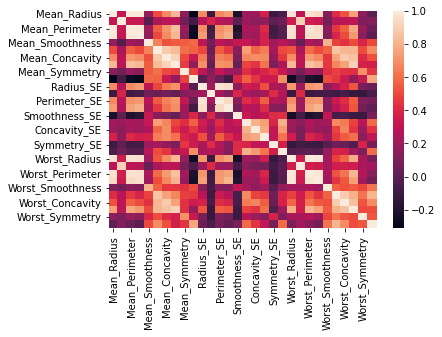

In [26]:
print("The number of variables are:", len(features))
print()
print(features)
# it computes the Pearson’s correlation coefficient.
corr_matrix = X.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_matrix, annot = False)
plt.show()

Splitting the dataset into training and testing

In [27]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


Training the first default tree model

In [28]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#clf = clf.fit (X,y)

Display the tree

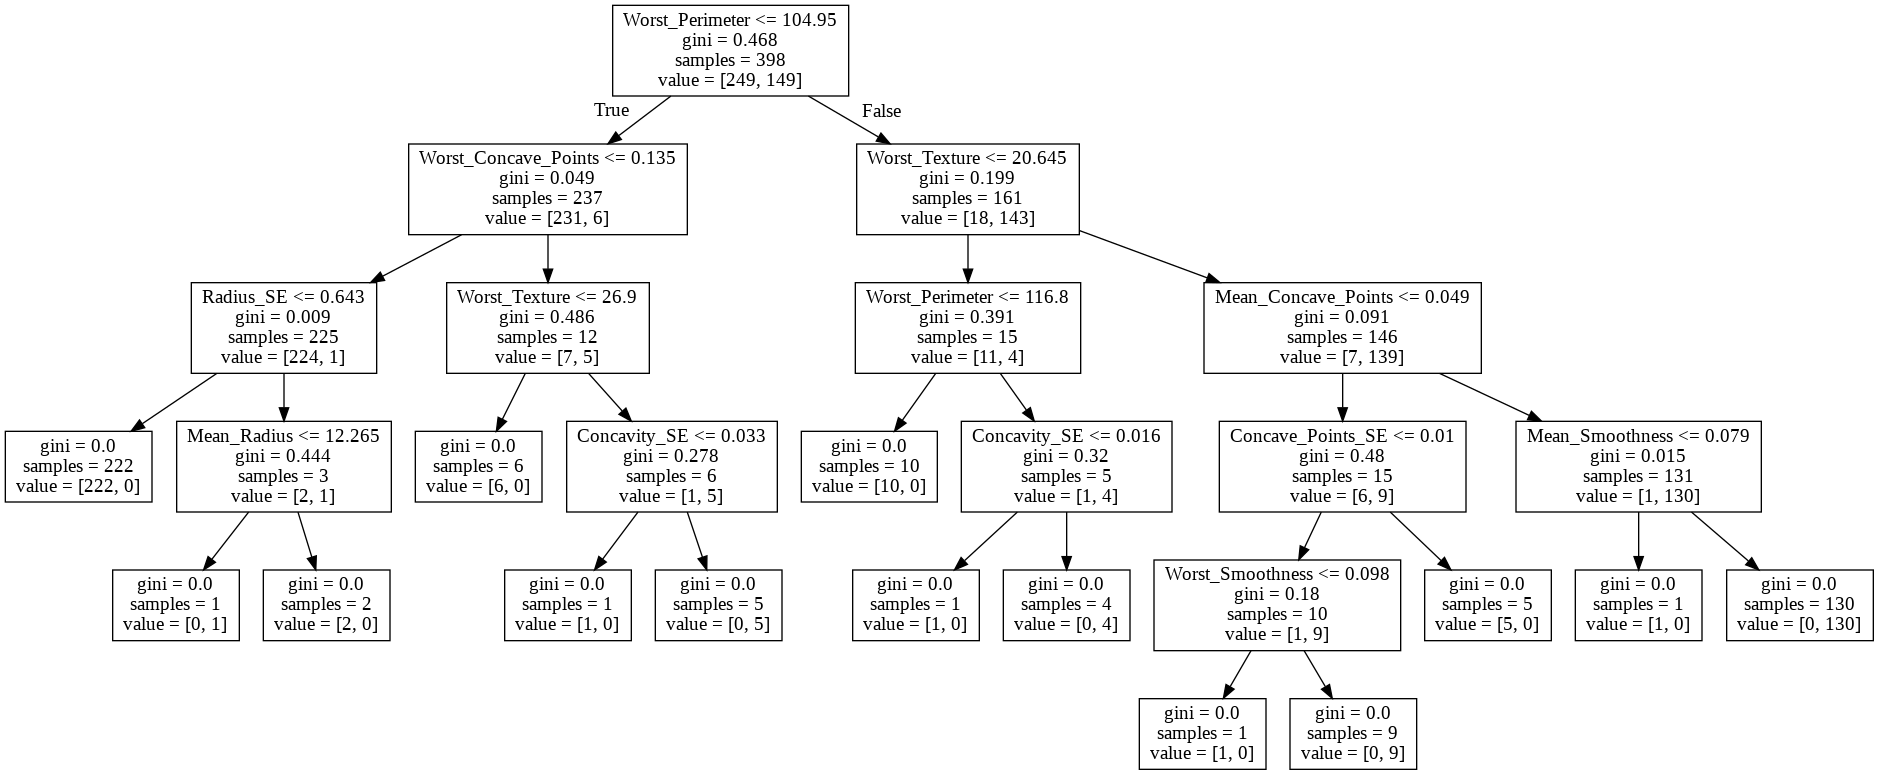

In [29]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for head data, this should really be fresh data not reusing training data 


In [ ]:
#When we use our training data above we should use our validation data here to test the predictions
print("Making predictions for the following 5 patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Desicion tree test results

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Random forrest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

So we can see that the Random forrest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini

In [ ]:
entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)


Display the entropy tree

In [ ]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Entropy Desicion tree test results

In [ ]:
#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Random Entropy forrest



In [ ]:
rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

testing via crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(1)
scores = cross_val_score(clf, X, y)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(entclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))


Creating the Model For DecisionTreeRegression() (Problematic due to M/B classification rather than a series of numeric variables, may not be a viable model for this data)